In [19]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from scipy.constants import *

from uncertainties import *
from uncertainties.umath import *

In [20]:
#Reading data

grad = pd.read_excel('data/F(L).xlsx')

U_1 = pd.read_excel('data/U_1.xlsx')
U_2 = pd.read_excel('data/U_2.xlsx')

F_1 = pd.read_excel('data/F_1.xlsx')
F_2 = pd.read_excel('data/F_2.xlsx')
F_3 = pd.read_excel('data/F_3.xlsx')

DC = pd.read_excel('data/DC.xlsx')

In [21]:
# Constants and values

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"

ax_l_size = 25
l_size = 23

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.6827)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

U_1_val = 730 #V
U_2_val = 704 #V

In [22]:
# Polynomial regression for gaduation of optical filter

coefficients = np.polyfit(grad['L'], grad['F'], 3)
f_x = np.linspace(grad['L'].min(), grad['L'].max(), 100)
f_fit = np.poly1d(coefficients)

In [23]:
# Polynomial regression for dark current

coefficients_10 = np.polyfit(DC['U_a'], DC['I_10'], 1)
coefficients_12 = np.polyfit(DC['U_a'], DC['I_12'], 3)
coefficients_a = np.polyfit(DC['U_a'], DC['I_a'], 3)

dc_x = np.linspace(DC['U_a'].min(), DC['U_a'].max(), 100)

dc_10_fit = np.poly1d(coefficients_10)
dc_12_fit = np.poly1d(coefficients_12)
dc_a_fit = np.poly1d(coefficients_a)

In [25]:
#Canculation

# DC collibration 

F_1['I_10'] = F_1['I_10'] - dc_10_fit(F_1['U_a'])
F_1['I_12'] = F_1['I_12'] - dc_12_fit(F_1['U_a'])
F_1['I_a'] = F_1['I_a'] - dc_a_fit(F_1['U_a'])

F_2['I_10'] = F_2['I_10'] - dc_10_fit(F_2['U_a'])
F_2['I_12'] = F_2['I_12'] - dc_12_fit(F_2['U_a'])
F_2['I_a'] = F_2['I_a'] - dc_a_fit(F_2['U_a'])

F_3['I_10'] = F_3['I_10'] - dc_10_fit(F_3['U_a'])
F_3['I_12'] = F_3['I_12'] - dc_12_fit(F_3['U_a'])
F_3['I_a'] = F_3['I_a'] - dc_a_fit(F_3['U_a'])

U_1['I_10'] = U_1['I_10'] - dc_10_fit(U_1_val)
U_1['I_12'] = U_1['I_12'] - dc_12_fit(U_1_val)
U_1['I_a'] = U_1['I_a'] - dc_a_fit(U_1_val)

U_2['I_10'] = U_2['I_10'] - dc_10_fit(U_2_val)
U_2['I_12'] = U_2['I_12'] - dc_12_fit(U_2_val)
U_2['I_a'] = U_2['I_a'] - dc_a_fit(U_2_val)

U_1['sigma'] = np.sqrt(U_1['I_12']/U_1['I_10'])
U_2['sigma'] = np.sqrt(U_2['I_12']/U_2['I_10'])

sigma_U_1 = ufloat(np.mean(U_1['sigma']), uncert(U_1['sigma'], 0.01))
sigma_U_2 = ufloat(np.mean(U_2['sigma']), uncert(U_2['sigma'], 0.01))

print(f'sigma_U_1 = {sigma_U_1}')
print(f'sigma_U_2 = {sigma_U_2}')

U_1['F'] = f_fit(U_1['F'])
U_2['F'] = f_fit(U_2['F'])

F_1_val = f_fit(1)
F_2_val = f_fit(4)
F_3_val = f_fit(7)

print(f'\nF_1 = {F_1_val}')
print(f'F_2 = {F_2_val}')
print(f'F_3 = {F_3_val}')

F_1['sigma'] = np.sqrt(F_1['I_12']/F_1['I_10'])
F_2['sigma'] = np.sqrt(F_2['I_12']/F_2['I_10'])
F_3['sigma'] = np.sqrt(F_3['I_12']/F_3['I_10'])

F_1['M'] = F_1['sigma']**2
F_2['M'] = F_2['sigma']**2
F_3['M'] = F_3['sigma']**2

F_1['I_f']  = F_1['I_a'] / F_1['M']
F_2['I_f']  = F_2['I_a'] / F_2['M']
F_3['I_f']  = F_3['I_a'] / F_3['M']

F_1['k'] = F_1['I_f']*10**(-6) / F_1_val
F_2['k'] = F_2['I_f']*10**(-6) / F_2_val
F_3['k'] = F_3['I_f']*10**(-6) / F_3_val

F_1['S'] = F_1['k'] * F_1['M']
F_2['S'] = F_2['k'] * F_2['M']
F_3['S'] = F_3['k'] * F_3['M']
 
F_1['ln(sig/V)'] = np.log(F_1['sigma']/F_1['U_a'])
F_2['ln(sig/V)'] = np.log(F_2['sigma']/F_2['U_a'])
F_3['ln(sig/V)'] = np.log(F_3['sigma']/F_3['U_a'])

sigma_U_1 = 3.453+/-0.013
sigma_U_2 = 3.305+/-0.013

F_1 = 8.984733708551558e-05
F_2 = 4.1694303868587123e-05
F_3 = 2.139049568567302e-05


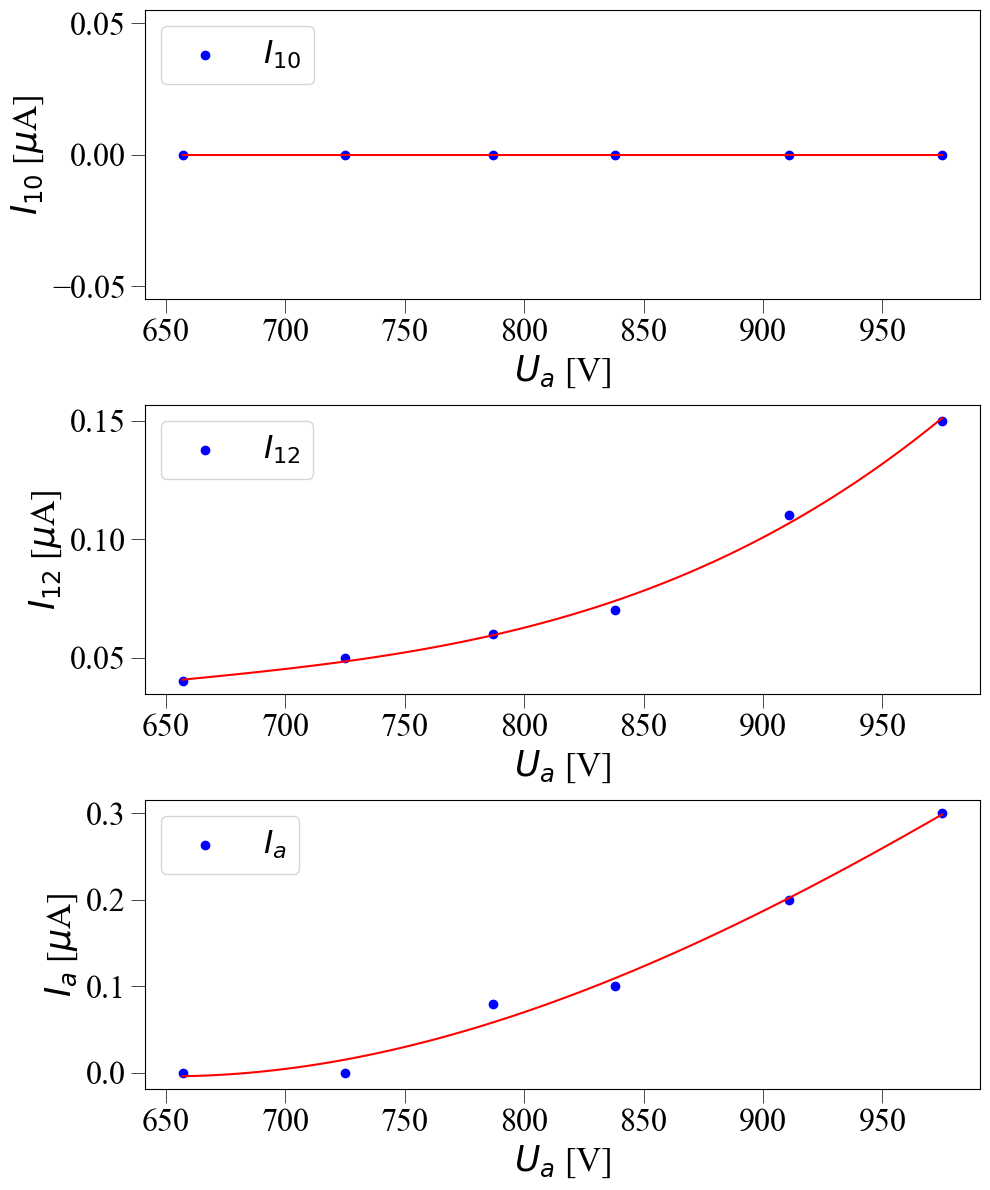

In [26]:
# Plot for dark corrent
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

ax1.set_xlabel(r"$U_a$ [V]")
ax1.set_ylabel(r"$I_{10}$ [$\mu$A]")
ax1.xaxis.label.set_fontsize(ax_l_size)
ax1.yaxis.label.set_fontsize(ax_l_size)
ax1.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax1.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
ax1.scatter(DC['U_a'], DC['I_10'], color='blue', label=r'$I_{10}$')
ax1.plot(dc_x, dc_10_fit(dc_x), color='red')

ax1.legend(loc='upper left', fontsize=23)

ax2.set_xlabel(r"$U_a$ [V]")
ax2.set_ylabel(r"$I_{12}$ [$\mu$A]")
ax2.xaxis.label.set_fontsize(ax_l_size)
ax2.yaxis.label.set_fontsize(ax_l_size)
ax2.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax2.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
ax2.scatter(DC['U_a'], DC['I_12'], color='blue', label=r'$I_{12}$')
ax2.plot(dc_x, dc_12_fit(dc_x), color='red')

ax2.legend(loc='upper left', fontsize=23)

ax3.set_xlabel(r"$U_a$ [V]")
ax3.set_ylabel(r"$I_a$ [$\mu$A]")
ax3.xaxis.label.set_fontsize(ax_l_size)
ax3.yaxis.label.set_fontsize(ax_l_size)
ax3.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax3.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
ax3.scatter(DC['U_a'], DC['I_a'], color='blue', label=r'$I_a$')
ax3.plot(dc_x, dc_a_fit(dc_x), color='red')

ax3.legend(loc='upper left', fontsize=23)

plt.tight_layout()
plt.show()

fig.savefig('images/dc.png', bbox_inches='tight')

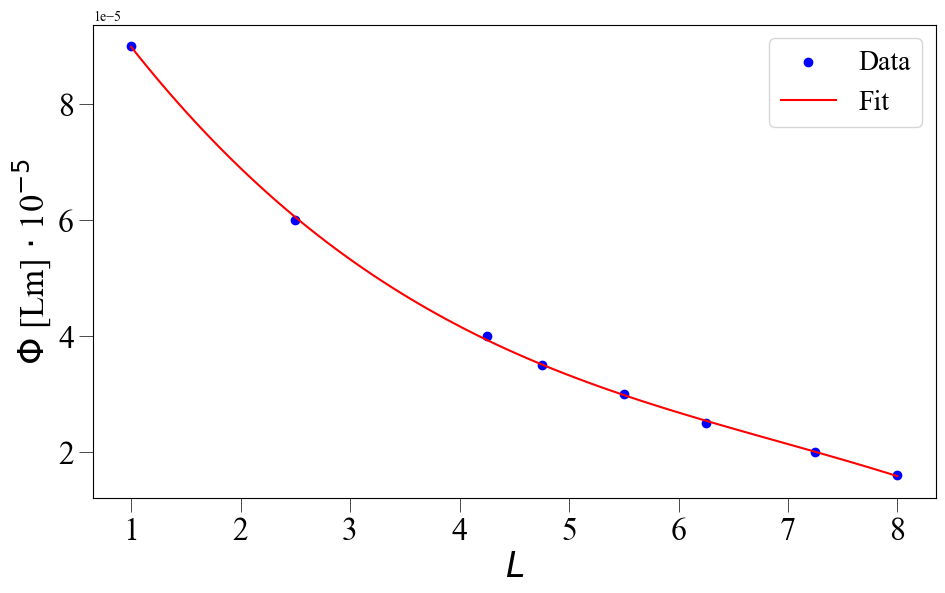

In [27]:
# Plot for inverted input (freq)

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$L$")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$\Phi$ [Lm] $\cdot$ 10$^{-5}$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
plt.tight_layout()  

ax.scatter(grad['L'], grad['F'], color='blue', label='Data')
ax.plot(f_x, f_fit(f_x), color='red', label='Fit')

ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('images/grad.png', bbox_inches='tight')

In [28]:
# Linear regression for sigma(F) U_1

slope, intercept, r_value, p_value, std_err = stats.linregress(U_1['F'], U_1['sigma'])

U_1_alpha = ufloat(slope, std_err)
print(f'U_1_alpha = {U_1_alpha}')

U_1_fit = slope * np.array(U_1['F']) + intercept

# Linear regression for sigma(F) U_2

slope, intercept, r_value, p_value, std_err = stats.linregress(U_2['F'], U_2['sigma'])

U_2_alpha = ufloat(slope, std_err)
print(f'U_2_alpha = {U_2_alpha}')

U_2_fit = slope * np.array(U_2['F']) + intercept


U_1_alpha = (-3.3+/-2.9)e+02
U_2_alpha = (0.7+/-3.0)e+02


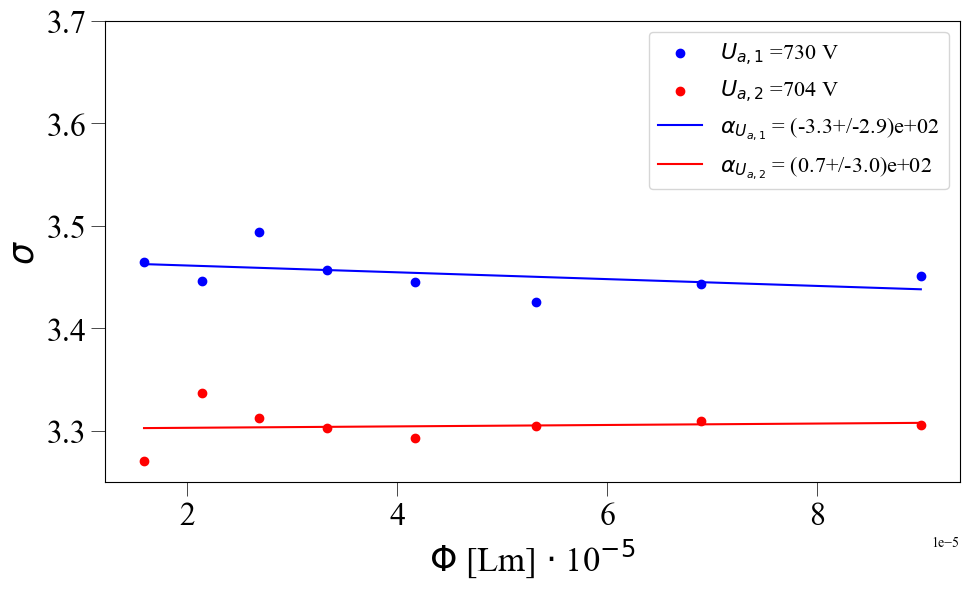

In [29]:
# Plot for sigma(F)

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$\Phi$ [Lm] $\cdot$ 10$^{-5}$")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$\sigma$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.set_ylim(3.25, 3.7)

ax.scatter(U_1['F'], U_1['sigma'], color='blue', label=r'$U_{a,1}$ =' + f'{U_1_val} V')
ax.scatter(U_2['F'], U_2['sigma'], color='red', label=r'$U_{a,2}$ =' + f'{U_2_val} V')

ax.plot(U_1['F'], U_1_fit, color='blue', label=r'$\alpha_{U_{a,1}}$ = ' + f'{U_1_alpha}')
ax.plot(U_2['F'], U_2_fit, color='red', label=r'$\alpha_{U_{a,2}}$ = ' + f'{U_2_alpha}')

ax.legend(loc='upper right', fontsize=16)

plt.show() 

fig.savefig('images/sigma(F).png', bbox_inches='tight')

In [30]:
# Linear regression for ln(sigma) F_1

slope, intercept, r_value, p_value, std_err = stats.linregress(F_1['U_a'], F_1['ln(sig/V)'])

F_1_alpha = ufloat(slope, std_err)
print(f'F_1_alpha = {F_1_alpha}')

F_1_fit = slope * np.array(F_1['U_a']) + intercept

# Linear regression for ln(sigma) F_2

slope, intercept, r_value, p_value, std_err = stats.linregress(F_2['U_a'], F_2['ln(sig/V)'])

F_2_alpha = ufloat(slope, std_err)
print(f'F_2_alpha = {F_2_alpha}')

F_2_fit = slope * np.array(F_2['U_a']) + intercept

# Linear regression for ln(sigma) F_3

slope, intercept, r_value, p_value, std_err = stats.linregress(F_3['U_a'], F_3['ln(sig/V)'])

F_3_alpha = ufloat(slope, std_err)
print(f'F_3_alpha = {F_3_alpha}')

F_3_fit = slope * np.array(F_3['U_a']) + intercept

F_1_alpha = -0.000146+/-0.000027
F_2_alpha = (0+/-4)e-05
F_3_alpha = -0.00019+/-0.00005


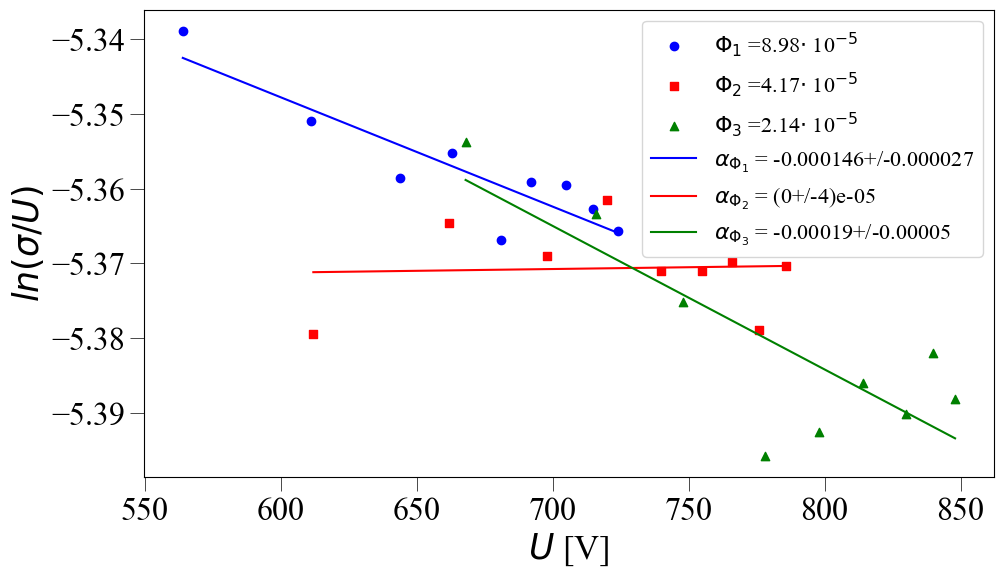

In [31]:
# Plot for ln(sigma/V) = f(V)

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$U$ [V]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$ln(\sigma/U)$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(F_1['U_a'], F_1['ln(sig/V)'], color='blue', label=r'$\Phi_1$ =' + f'{F_1_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')
ax.scatter(F_2['U_a'], F_2['ln(sig/V)'], color='red', marker='s', label=r'$\Phi_2$ =' + f'{F_2_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')
ax.scatter(F_3['U_a'], F_3['ln(sig/V)'], color='green', marker='^', label=r'$\Phi_3$ =' + f'{F_3_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')

ax.plot(F_1['U_a'], F_1_fit, color='blue', label=r'$\alpha_{\Phi_1}$ = ' + f'{F_1_alpha}')
ax.plot(F_2['U_a'], F_2_fit, color='red', label=r'$\alpha_{\Phi_2}$ = ' + f'{F_2_alpha}')
ax.plot(F_3['U_a'], F_3_fit, color='green', label=r'$\alpha_{\Phi_3}$ = ' + f'{F_3_alpha}')


ax.legend(loc='upper right', fontsize=16)

plt.show() 

fig.savefig('images/ln(sigma).png', bbox_inches='tight')

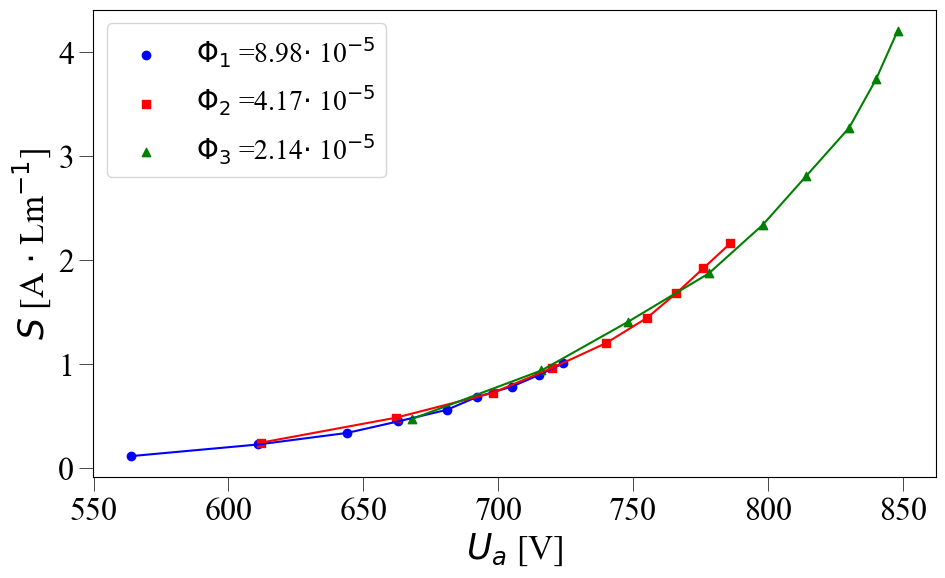

In [32]:
# Plot for S = f(U)

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$U_a$ [V]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$S$ [A $\cdot$ Lm$^{-1}$]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(F_1['U_a'], F_1['S'], color='blue', label=r'$\Phi_1$ =' + f'{F_1_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')
ax.scatter(F_2['U_a'], F_2['S'], color='red', marker='s', label=r'$\Phi_2$ =' + f'{F_2_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')
ax.scatter(F_3['U_a'], F_3['S'], color='green', marker='^', label=r'$\Phi_3$ =' + f'{F_3_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')

ax.plot(F_1['U_a'], F_1['S'], color='blue')
ax.plot(F_2['U_a'], F_2['S'], color='red')
ax.plot(F_3['U_a'], F_3['S'], color='green')

ax.legend(loc='upper left', fontsize=20)

plt.show() 

fig.savefig('images/S(U).png', bbox_inches='tight')

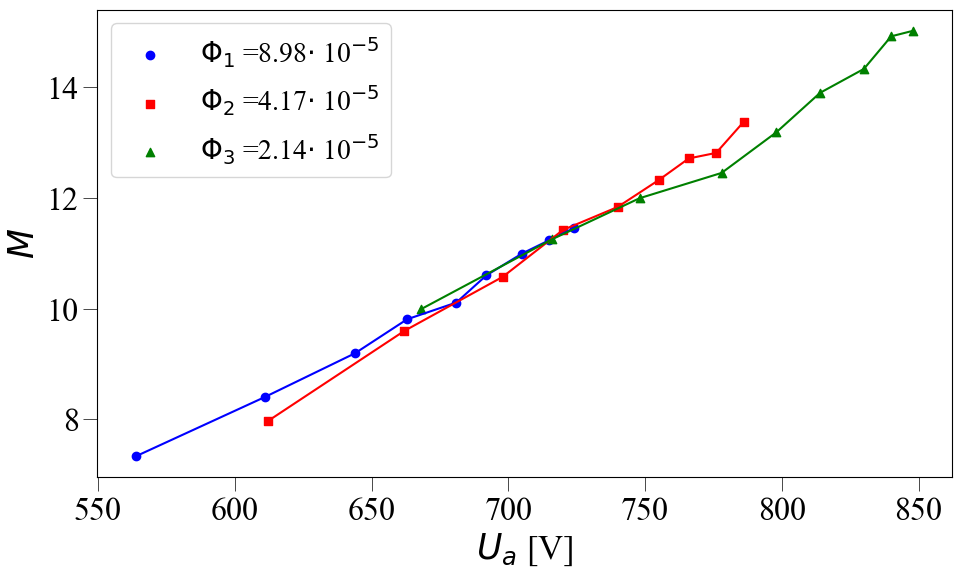

In [33]:
# Plot for M = f(U)

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$U_a$ [V]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$M$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(F_1['U_a'], F_1['M'], color='blue', label=r'$\Phi_1$ =' + f'{F_1_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')
ax.scatter(F_2['U_a'], F_2['M'], color='red', marker='s', label=r'$\Phi_2$ =' + f'{F_2_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')
ax.scatter(F_3['U_a'], F_3['M'], color='green', marker='^', label=r'$\Phi_3$ =' + f'{F_3_val*10**(5):.2f}' + r'$\cdot$ 10$^{-5}$')

ax.plot(F_1['U_a'], F_1['M'], color='blue')
ax.plot(F_2['U_a'], F_2['M'], color='red')
ax.plot(F_3['U_a'], F_3['M'], color='green')

ax.legend(loc='upper left', fontsize=20)

plt.show() 

fig.savefig('images/M(U).png', bbox_inches='tight')

In [34]:
U_1['F'] = U_1['F']*10**(5)
U_2['F'] = U_2['F']*10**(5)

U_1 = U_1.round(2)
U_2 = U_2.round(2)

F_1 = F_1.round(3)
F_2 = F_2.round(3)
F_3 = F_3.round(3)

U_1.to_csv('data/U_1_out.csv', index=False)
U_2.to_csv('data/U_2_out.csv', index=False)

F_1.to_csv('data/F_1_out.csv', index=False)
F_2.to_csv('data/F_2_out.csv', index=False)
F_3.to_csv('data/F_3_out.csv', index=False)

DC.to_csv('data/DC_out.csv', index=False)